In [1]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
#gpt-4-0125-preview")

In [ ]:
import os
from pypdf import PdfReader
from langchain_core.documents import Document
directory = 'jpdf/'
graph_documents = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and str(filename).endswith('.pdf'):
        reader = PdfReader(f)
        print(f"Processing file: {str(filename)}: {len(reader.pages)} pages")
        doc_pages_txt = ''
        for page in reader.pages:
            doc_pages_txt = doc_pages_txt + page.extract_text()
            documents = [Document(page_content=doc_pages_txt)]
            graph_documents.append(llm_transformer.convert_to_graph_documents(documents))
        print(f"Processed file: {str(filename)}: {len(reader.pages)} pages")

In [ ]:
from pypdf import PdfReader
reader = PdfReader('pdf/NCT04518995.pdf')
doc_pages_txt = ''
for page in reader.pages:
    doc_pages_txt = doc_pages_txt + page.extract_text()

In [2]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("pdf/NCT04518995.pdf")
pages = loader.load_and_split()

In [3]:
from langchain_core.documents import Document
documents = []
for p in range(len(pages)):
    #print(pages[p].page_content)
    documents.append(Document(page_content=pages[p].page_content))

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA

In [5]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=300)
docs_split = text_splitter.split_documents(documents)

In [6]:
embeddings = OpenAIEmbeddings()

In [7]:
db = FAISS.from_documents(docs_split, embeddings)

In [8]:
retriever = db.as_retriever()

In [9]:
from langchain.prompts import ChatPromptTemplate

In [ ]:
template = """Using this provided ontology followed by the triples below, please create a knowledge graph consisting 
of the ontology and triples combined amd place th knowledge graph in a ttl file.

… <Ontology>…
 
...<knowledge graph>...

@prefix ct: <http://example.org/jnj#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .

ct:AFFILIATED_WITH a owl:ObjectProperty .

ct:ALSO_KNOWN_AS a owl:ObjectProperty .

ct:APPROVAL_DATE a owl:ObjectProperty .

ct:BRAND_OF a owl:ObjectProperty .

ct:Bahru_Habtermariam a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Bortezomib a ct:Substance .

ct:CHANGE_DATE a owl:ObjectProperty .

ct:COMPOSITION a owl:ObjectProperty .

ct:CONTACT a owl:ObjectProperty .

ct:Carfilzomib a ct:Substance .

ct:Darzalex a ct:Drug ;
    ct:APPROVAL_DATE ct:2015 ;
    ct:CHANGE_DATE <http://example.org/jnj#1/2022>,
        <http://example.org/jnj#10/2021> ;
    ct:COMPOSITION ct:Daratumumab ;
    ct:REVISION_DATE <http://example.org/jnj#3/2022> .

ct:Darzalextm a ct:Brand_name ;
    ct:BRAND_OF ct:Daratumumab .

ct:Dexamethasone a ct:Substance .

ct:Division_Of_Hematology_Products a ct:Organization .

ct:Fda_761036 a ct:Application_number ;
    ct:RELATED_TO <http://example.org/jnj#Ind_100,638> .

<http://example.org/jnj#Janssen_Biotech,_Inc.> a ct:Organization ;
    ct:CONTACT ct:1-800-526-7736,
        ct:Fda .

<http://example.org/jnj#Janssen_Biotech_Inc.> a ct:Organization ;
    ct:SPONSORED ct:761036Orig1S000 .

ct:Jeanne_Fourie_Zirkelbach a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Lenalidomide a ct:Substance .

ct:Lian_Ma a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Melphalan a ct:Substance .

ct:Nitin_Mehrotra a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:Pomalidomide a ct:Substance .

ct:Prednisone a ct:Substance .

ct:RELATED_TO a owl:ObjectProperty .

ct:REVISION_DATE a owl:ObjectProperty .

ct:Robert_Schuck a ct:Person ;
    ct:AFFILIATED_WITH ct:Division_Of_Clinical_Pharmacology_V .

ct:SPONSORED a owl:ObjectProperty .

ct:SUBMITTED_TO a owl:ObjectProperty .

ct:TREATS a owl:ObjectProperty .

ct:Thalidomide a ct:Substance .

ct:WEBSITE a owl:ObjectProperty .

<http://example.org/jnj.ttl> a owl:Ontology .

ct:1-800-526-7736 a ct:Contact_information .

ct:1-800-Fda-1088 a ct:Contact_information .

<http://example.org/jnj#1/2022> a ct:Date .

<http://example.org/jnj#10/2021> a ct:Date .

ct:2015 a ct:Date .

<http://example.org/jnj#3/2022> a ct:Date .

ct:761036Orig1S000 a ct:Application_number ;
    ct:SUBMITTED_TO ct:Center_For_Drug_Evaluation_And_Research .

ct:Brand_name a owl:Class .

ct:Center_For_Drug_Evaluation_And_Research a ct:Organization .

ct:Condition a owl:Class .

ct:Drug a owl:Class .

ct:Fda a ct:Organization ;
    ct:CONTACT ct:1-800-Fda-1088 ;
    ct:WEBSITE <http://example.org/jnj#Www.Fda.Gov/Medwatch> .

ct:Generic_name a owl:Class .

ct:Humax-Cd38 a ct:Identifier .

<http://example.org/jnj#Ind_100,638> a ct:Application_number .

ct:Jnj-54767414 a ct:Identifier .

ct:Multiple_Myeloma a ct:Condition .

ct:Website a owl:Class .

<http://example.org/jnj#Www.Fda.Gov/Medwatch> a ct:Website .

ct:Contact_information a owl:Class .

ct:Daratumumab a ct:Generic_name,
        ct:Substance ;
    ct:ALSO_KNOWN_AS ct:Humax-Cd38,
        ct:Jnj-54767414 ;
    ct:TREATS ct:Multiple_Myeloma .

ct:Identifier a owl:Class .

ct:Application_number a owl:Class .

ct:Date a owl:Class .

ct:Division_Of_Clinical_Pharmacology_V a ct:Organization .

ct:Person a owl:Class .

ct:Organization a owl:Class .

ct:Substance a owl:Class .

"""
QA_CHAIN_PROMPT = ChatPromptTemplate.from_template(template)

In [10]:
template = """Use the following pieces of context
to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up answer.
Keep the answer as comprehensive as possible.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = ChatPromptTemplate.from_template(template)

In [11]:
question = "What are the exclusion criteria for this trial"
#What adverse events are possibly related to the study drug"
#Which organization is sponsoring this trial"

#"What are the adverse reactions for Darzalex?"
qa_chain = RetrievalQA.from_chain_type(llm,retriever=retriever)
print(qa_chain.invoke(question)['result'])

The exclusion criteria for the trial are as follows:

1. Female subjects who are pregnant, nursing, or planning a pregnancy during the study.
2. History of malignancy within the past 5 years, except for adequately treated basal cell or squamous cell skin cancer, or in situ cervical cancer.
3. History of lymphoproliferative disease, including lymphoma, or signs and symptoms suggestive of lymphoproliferative disease.
4. History of recurrent (more than one episode) herpes zoster or disseminated (more than one dermatome) herpes simplex.
5. History of any major cardiovascular event (e.g., myocardial infarction, stroke, unstable angina) within 6 months prior to Screening.
6. History of any major thromboembolic event (e.g., deep vein thrombosis, pulmonary embolism) within 6 months prior to Screening.
7. History of any major bleeding event (e.g., gastrointestinal bleeding, intracranial hemorrhage) within 6 months prior to Screening.
8. History of any major surgery within 8 weeks prior to Scree

In [12]:
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough
qa2_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | QA_CHAIN_PROMPT
    | llm
    | StrOutputParser()
)

In [13]:
RAG_response = qa2_chain.invoke("If I have skin cancer, would I be able to participate in this trial?")
print(RAG_response)

Based on the provided context, if you have a history of non-melanoma skin cancer, you may still be eligible to participate in the trial. However, if you have had three or more basal or squamous cell carcinomas diagnosed in the past two years, you would be excluded from the study. Additionally, the study includes regular skin examinations for non-melanoma skin cancers to monitor participants' health.

Therefore, your eligibility would depend on the specifics of your skin cancer history. If you have had fewer than three basal or squamous cell carcinomas in the past two years, you may be eligible. If you have had three or more, you would not be eligible.


In [57]:
qa2_chain.invoke("If I have Melanoma, would I be able to participate in this trial?")

"Based on the provided context, there is no specific mention of melanoma as an exclusion criterion for participating in the trial. However, the documents do list several exclusion criteria related to other medical conditions and treatments, such as active scalp inflammation, psoriasis, seborrheic dermatitis, significant trauma to the scalp, and untreated actinic keratosis.\n\nGiven that melanoma is a serious condition, it is advisable to consult with the Principal Investigator (PI) or the Medical Monitor of the study to determine eligibility. They would be able to provide a definitive answer based on the specific details of your medical history and the study's inclusion and exclusion criteria.\n\nSo, the best course of action would be to discuss your condition with the study's medical team."

### Use Graph Transformer for E/R Extraction

In [14]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, OWL, XSD, SKOS, NamespaceManager
from uuid import uuid4

def get_ontology_components():
    g = Graph()
    g.parse("ttl/ctgo.ttl")
    qres = g.query("""
SELECT ?s
WHERE { 
?s a owl:Class .
}
ORDER BY ?s""")
    classes = []
    for row in qres:
        classes.append(row.s.fragment)
    
    qres = g.query("""
    SELECT ?p
    WHERE {
    ?p a owl:ObjectProperty .
    }
    ORDER BY ?p""")
    relationships = []
    for row in qres:
        relationships.append(row.p.fragment)
    return classes, relationships

In [15]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
#classes, properties = get_ontology_components()
llm_transformer = LLMGraphTransformer(llm=llm)
                                      #,allowed_nodes=classes, allowed_relationships=properties)

In [16]:
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [17]:
len(graph_documents)

90

In [25]:
print(f"Nodes:{graph_documents[2].nodes}")
print(f"Relationships:{graph_documents[2].relationships}")
count = 0
for doc in graph_documents:
    count += len(doc.relationships)
    for node in doc.nodes:
        if node.id == "Adverse Event":
            print(f"{node.id} : {node.type}")
    
print(f"Relationship count: {count}")

Nodes:[Node(id='Ctp-543', type='Protocol'), Node(id='Cp543.3001', type='Protocol'), Node(id='28 April 2021', type='Date'), Node(id='Concert Pharmaceuticals, Inc.', type='Organization'), Node(id='North American Contact Information', type='Contact_information'), Node(id='Md', type='Person')]
Relationships:[Relationship(source=Node(id='Ctp-543', type='Protocol'), target=Node(id='Cp543.3001', type='Protocol'), type='HAS_CODE'), Relationship(source=Node(id='Ctp-543', type='Protocol'), target=Node(id='28 April 2021', type='Date'), type='HAS_DATE'), Relationship(source=Node(id='Ctp-543', type='Protocol'), target=Node(id='Concert Pharmaceuticals, Inc.', type='Organization'), type='BELONGS_TO'), Relationship(source=Node(id='North American Contact Information', type='Contact_information'), target=Node(id='Md', type='Person'), type='HAS_CONTACT')]
Adverse Event : Concept
Adverse Event : Event
Adverse Event : Concept
Adverse Event : Event
Adverse Event : Event
Adverse Event : Event
Adverse Event :

### Generate Triples from graph documents

In [18]:
def add_graph_documents(graph_documents, base_iri, kg_uri, output_file, ontology_file=None):
    g = Graph()
    # Define namespaces
    prefixes = {
        'xsd': XSD,
        'rdf': RDF,
        'rdfs': RDFS,
        'owl': OWL,
        'dct': Namespace('http://purl.org/dc/terms/'),
        'skos': SKOS,
        'cmns-av': Namespace('https://www.omg.org/spec/Commons/AnnotationVocabulary/'),
        'ct': Namespace(base_iri)
    }
    for p, ns in prefixes.items():
        g.bind(p, ns)
    if ontology_file is not None:
        g.parse(ontology_file)
        
    prefix = base_iri
    g.add((URIRef(kg_uri), RDF.type, OWL.Ontology))

    for docs in graph_documents:
        """
        for node in docs.nodes:
           # subject = URIRef(prefix + (node.id.replace(' ', '_').replace('>','gt_').replace('<','lt_')))
           # subject = URIRef(subject.replace("\(","").replace("\)",""))
            subject = URIRef(prefix + str(uuid4().hex))
            
            literal_object = Literal(node.id) 
            object = URIRef(prefix + node.type.replace(' ', '_').replace('>','gt_').replace('<','lt_'))
            object = URIRef(object.replace("\(","").replace("\)",""))
           
            # do not add Class if it exists in ontology
            if (object, RDF.type, OWL.Class) not in g:
                g.add((object, RDF.type, OWL.Class))
                g.add((subject, RDFS.label, literal_object))
                g.add((subject, RDF.type, object))
        """
        
        for rel in docs.relationships:
            subject = rel.source.id.replace(' ', '_').replace('>','gt_').replace('<','lt_')
            subject = subject.replace("\(","").replace("\)","")
            
            literal_label1 = Literal(subject) 
            instance_id1 = URIRef(prefix + str(uuid4().hex))
            object = URIRef(prefix + rel.source.type.replace(' ', '_').replace('>','gt_').replace('<','lt_'))
            object = URIRef(object.replace("\(","").replace("\)",""))
            
            # do not add Class if it exists in ontology
            if (object, RDF.type, OWL.Class) not in g:
                g.add((object, RDF.type, OWL.Class))
            g.add((instance_id1, RDF.type, object))
            g.add((instance_id1, RDFS.label, literal_label1))
                
            subject = rel.target.id.replace(' ', '_').replace('>','gt_').replace('<','lt_')
            subject = subject.replace("\(","").replace("\)","")
            
            literal_label2 = Literal(subject) 
            instance_id2 = URIRef(prefix + str(uuid4().hex))
            object = URIRef(prefix + rel.target.type.replace(' ', '_').replace('>','gt_').replace('<','lt_'))
            object = URIRef(object.replace("\(","").replace("\)",""))
            
            # do not add Class if it exists in ontology
            if (object, RDF.type, OWL.Class) not in g:
                g.add((object, RDF.type, OWL.Class))
            g.add((instance_id2, RDF.type, object))
            g.add((instance_id2, RDFS.label, literal_label2))
                
            predicate = URIRef(prefix + rel.type.replace(' ', '_'))

            # do not add ObjectProperty if it exists in ontology
            if (predicate, RDF.type, OWL.ObjectProperty) not in g:
                g.add((predicate, RDF.type, OWL.ObjectProperty))
                domain = URIRef(prefix + rel.source.type.replace(' ', '_'))
                range = URIRef(prefix + rel.target.type.replace(' ', '_'))
                g.add((predicate, RDFS.domain, domain))
                g.add((predicate, RDFS.range, range))
            g.add((instance_id1, predicate, instance_id2)) 
            
    g.serialize(output_file,format='turtle',prefixes = prefixes, encoding='utf-8')
    return g

In [19]:
def run_query(rdf_graph, query, predicate, tobject):
    qres = rdf_graph.query(query)
    triples = []
    for row in qres:
        triples.append((row.label, predicate, tobject))
    return triples

In [ ]:
classes = set()
for docs in graph_documents:
        for node in docs.nodes:
            if node.id == 'Adverse Events':
                print(node.type)
#            classes.add(node.type)
#for cl in sorted(classes):
#    print(cl)

In [27]:
rdf_graph = add_graph_documents(graph_documents, 'http://example.org/ct#', 'http://example.org/ct.ttl', 'ttl/ct.ttl')

### SPARQL Query to test KG

In [ ]:
qres = rdf_graph.query("""
SELECT ?i ?label ?c
WHERE { 
?c a owl:Class .
?i a ?c ;
   rdfs:label ?label
}
""")
print(len(qres))
for row in qres:
    print(f"{row.i.fragment} : {row.label} : {row.c.fragment}")

In [21]:
graph_retriever = rdf_graph.serialize()

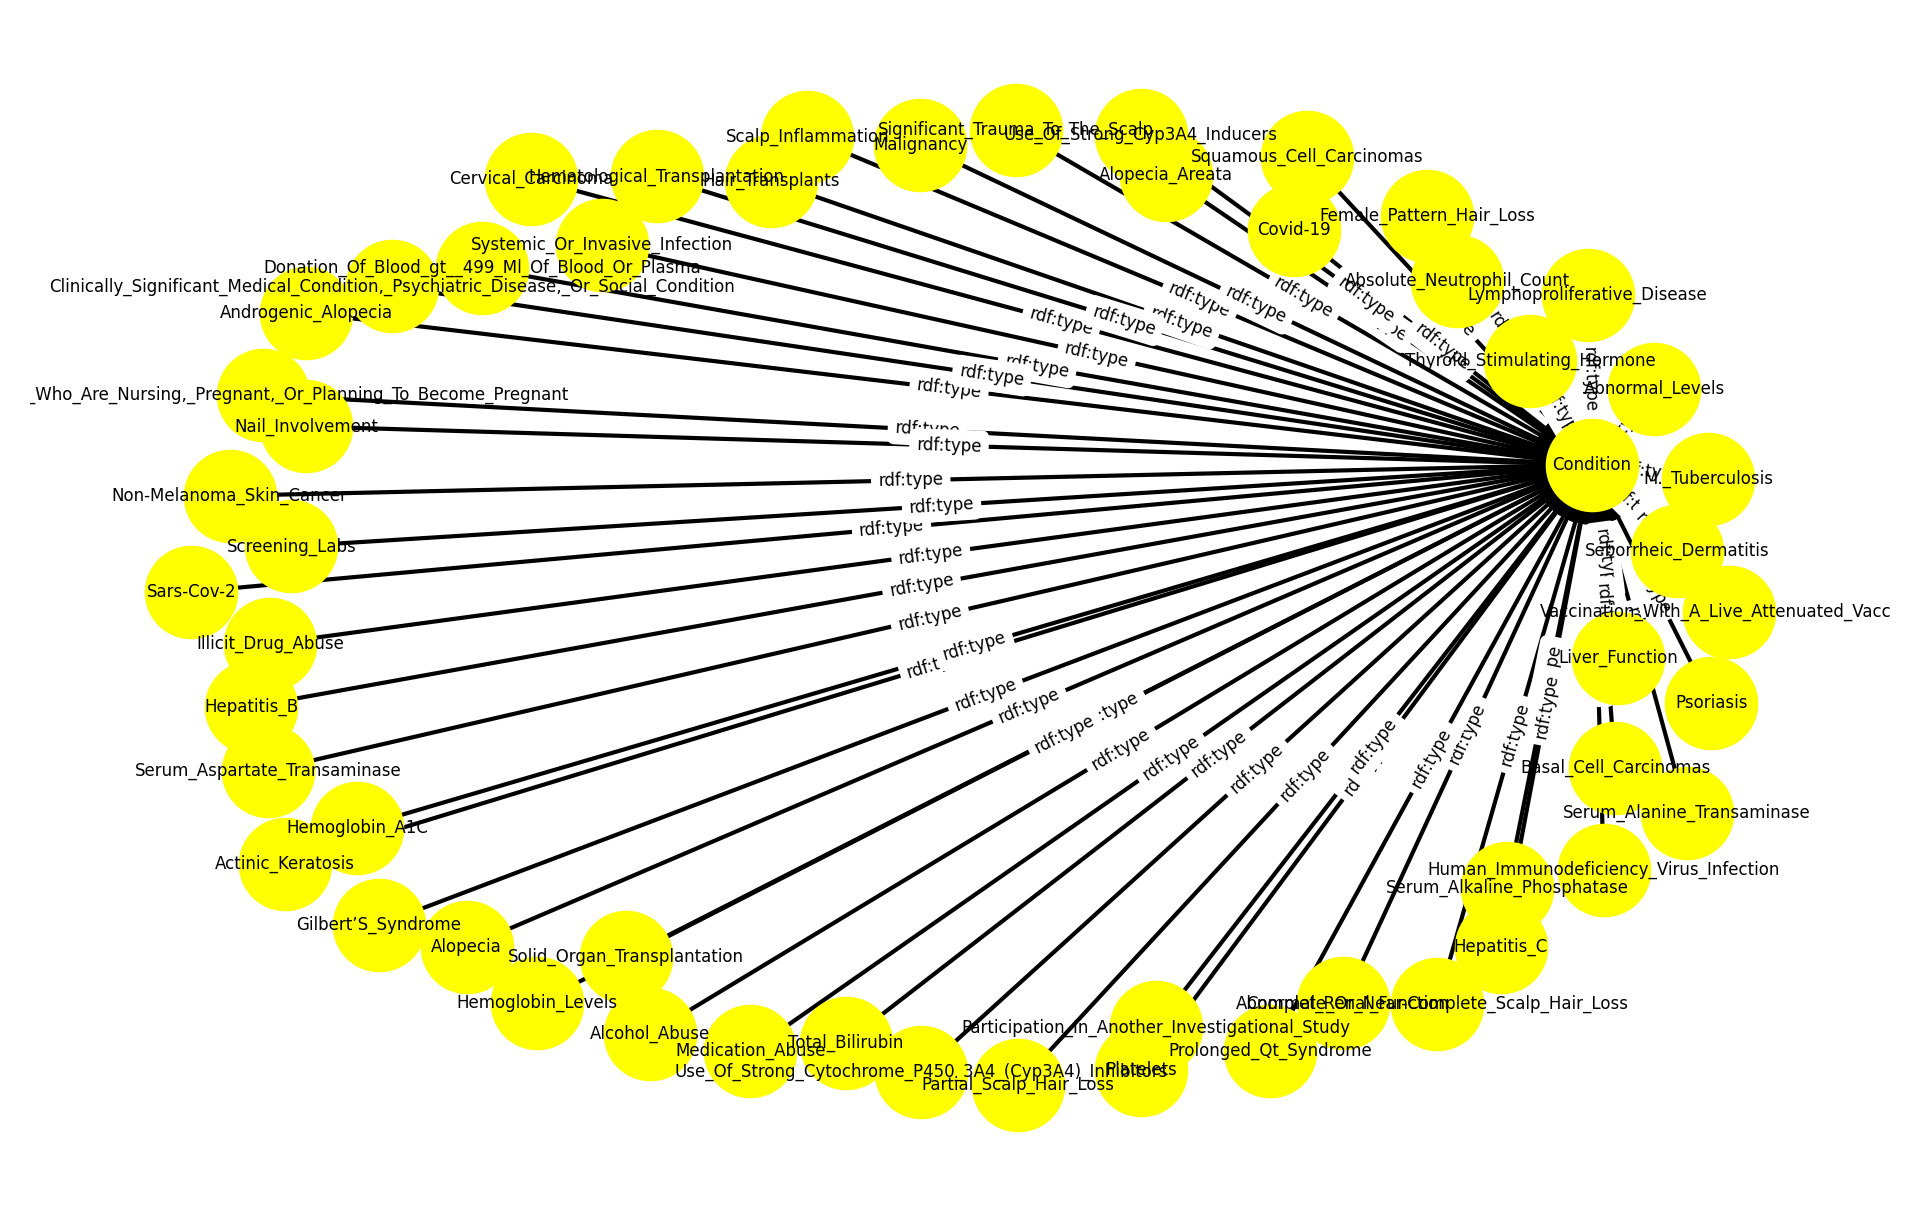

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

predicate = 'rdf:type'
tobject = 'Condition'
query = '{0}'.format("SELECT ?label WHERE { ?i " + predicate + " <http://example.org/ct#" + tobject + "> ; rdfs:label ?label .}")
triples = run_query(rdf_graph,query,predicate,tobject)

# Create graph
G = nx.DiGraph()
G.add_edges_from((source, target, 
                  {'relation': relation}) 
#                 for source, relation, target in rdf_graph.triples((None,None,URIRef('http://example.org/ct#Condition'))))
                  for source, relation, target in triples)

# Plot the graph
plt.figure(figsize=(8,5), dpi=300)
pos = nx.spring_layout(G, k=3, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=460, node_color='yellow')
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=4)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=4)

# Display the plot
plt.axis('off')
plt.show()

## Store KG in a VDB

In [30]:
from langchain_community.document_loaders import TextLoader
loader = TextLoader("ttl/ct.ttl",encoding='utf-8')
kg_documents = loader.load()

In [31]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
kg_docs = text_splitter.split_documents(kg_documents)

In [32]:
KGvectorstore = FAISS.from_documents(kg_docs, embeddings)
KGretriever = KGvectorstore.as_retriever()

### Query the KG stored in the VDB without using SPARQL

In [55]:
question = "What are the exclusion criteria for this trial?"
#Display each of the results using its rdfs:label value" 
#"Which organization is sponsoring this trial" 

KG_qa_chain = RetrievalQA.from_chain_type(llm,retriever=KGretriever)

In [56]:
print(KG_qa_chain.invoke(question)['result'])

The exclusion criteria for this trial include:

1. **Exclusion_Criteria**: Excludes ct:0eacf4eb92144b6ea7452b34a4b619e5.
2. **Patient_Exclusion_Criteria**: Excludes ct:6eff9e5b4b2841dc873b144788e16f87.
3. **Patient_Exclusion_Criteria**: Excludes ct:0181234950424b2ea4883b1bd673b934.
4. **Patient_Exclusion_Criteria**: Excludes ct:26262143206f44798f3dcf16576657e5.
5. **Patient_Exclusion_Criteria**: Excludes ct:8e64b43b95554392a846503117c4e149.
6. **Patient_Exclusion_Criteria**: Excludes ct:556c08d442b84309ad55d8d5d9bde70d.


In [40]:
print(KG_qa_chain.invoke("If I have Melanoma, would I be able to participate in this trial?")['result'])

Based on the provided context, it appears that the trial has exclusion criteria that exclude certain conditions. Specifically, the context mentions "Exclusion_Criteria" which "EXCLUDES" certain conditions. One of the conditions listed under "Condition" is "Malignancy," which includes "Melanoma."

Therefore, if you have Melanoma, you would likely be excluded from participating in this trial.


In [ ]:
template = """The following are 2 sections of text. Each section is labled with a number:
1.) """ + RAG_response + """
2.) """ + KG_response + """

Use the following pieces of context
to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up answer.
Keep the answer as concise as possible.

Question: {question}
Helpful Answer:"""
COMPARE_QA_CHAIN_PROMPT = ChatPromptTemplate.from_template(template)

In [ ]:
qa3_chain = (
    {"context": KGretriever, "question": RunnablePassthrough()}
    | COMPARE_QA_CHAIN_PROMPT
    | llm
    | StrOutputParser()
)

In [ ]:
KG_response = qa3_chain.invoke("If I have skin cancer, would I be able to participate in this trial?")
print(KG_response)

In [ ]:
RAG_response = """Based on the provided context, if you have a history of non-melanoma skin cancer, you may still be eligible to 
participate in the trial. However, if you have had three or more basal or squamous cell carcinomas diagnosed in the past two years, 
you would be excluded from the study. Additionally, the study includes regular skin examinations for non-melanoma skin cancers to 
monitor participants' health.

Therefore, your eligibility would depend on the specifics of your skin cancer history. If you have had fewer than three basal or 
squamous cell carcinomas in the past two years, you may be eligible. If you have had three or more, you would not be eligible."""

In [ ]:
KG_response = """Based on the provided context, there is no explicit mention of skin cancer as an exclusion criterion for participation in the trial. However, the context does specify certain conditions and criteria that could affect eligibility:

1. **Inclusion Criteria:**
   - Must have a diagnosis of Alopecia Areata.
   - Must be between 18 and 65 years of age.
   - Must be willing to comply with study visits and requirements.
   - Must have a Salt Score ≥ 50 and scalp hair loss.
   - Must provide informed consent and authorization for the release and use of protected health information.

2. **Exclusion Criteria:**
   - Vaccinated with Herpes Zoster Vaccine or Live Attenuated Vaccine.
   - Experiences adverse events or serious adverse events.
   - Has a condition such as SARS-CoV-2 infection.

Given that skin cancer is not explicitly mentioned as an exclusion criterion, it is not clear from the provided context whether having skin cancer would automatically disqualify you from participating in the trial. However, clinical trials often have detailed inclusion and exclusion criteria that may not be fully captured in the provided documents.

To get a definitive answer, it would be best to consult the specific trial protocol or contact the study organizers directly. They can provide detailed information on whether skin cancer would impact your eligibility for the trial."""

In [ ]:
compare_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | COMPARE_QA_CHAIN_PROMPT
    | llm
    | StrOutputParser()
)

In [ ]:
print(compare_chain.invoke("Compare the two sections of text and determine if they are similar in content and also explain their differences"))

In [ ]:
# Nodes:[Node(id='', type='')
print(graph_documents[0].nodes[0].id)
print(graph_documents[0].nodes[0].type)

# Relationships:[Relationship(source=Node(id='', type=''), target=Node
# (id='', type=''), type='HAS_IDENTIFIER')
print(graph_documents[0].relationships[0].source.id)
print(graph_documents[0].relationships[0].source.type)
print(graph_documents[0].relationships[0].target.id)
print(graph_documents[0].relationships[0].target.type)
print(graph_documents[0].relationships[0].type)

In [ ]:
# TODO: Load in records (instances and ObjectProperty Assertions)
# Load data to existing ontology ttl
# Save it all to another ttl file for GraphRAG

In [ ]:
str(uuid4().hex)

In [ ]:
kg_documents[0].page_content

In [42]:
gr = Graph()
gr.parse('ttl/ct.ttl')

<Graph identifier=N8d20a7a33d6043d384d841754fb31581 (<class 'rdflib.graph.Graph'>)>